In [2]:
import pandas as pd
#load data from csv
df = pd.read_csv('shareholders_list.csv')
df_old = pd.read_csv('shareholders_list_initial_hundred.csv')
df = df.append(df_old)

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_59937/3373365798.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_old)


In [3]:
# remove duplicate rows, keeping the first occurence. A duplicate is only in terms of name and company
print("previous length of df: ", len(df))
df = df.drop_duplicates(subset=['name', 'company'], keep='first')
print("new length of df after dropping duplicates: ", len(df))
# convert total_participation_in_percent to float, force it
#replace all total_participation_in_percent with random values between 0 and 20
import random
import numpy as np
df['total_participation_in_percent'] = np.random.uniform(0, 20, len(df))

#import csv as df
df2 = pd.read_csv('locations_matched.csv')

#separate location column into 2 columns, mapped and location
df2[['mapped', 'location']] = df2['location;mapped'].str.split(';', expand=True)

#transform df2 to a dictionary, with column 1 as key and column 2 as value
df2_dict = df2.set_index('mapped')['location'].to_dict()


#replace all mapped values in df with the values in df2_dict
df['location'] = df['location'].map(df2_dict)

print(df)





previous length of df:  1092
new length of df after dropping duplicates:  1035
                                              name  \
0    Spitzstein Management UG (haftungsbeschrankt)   
1                              Herr Lieven Hauspie   
2          GBS Investments UG (haftungsbeschrankt)   
3           KM Investments UG (haftungsbeschrankt)   
4       SH Energy Vertures UG (haftungsbeschrankt)   
..                                             ...   
574                        Herr Ashok Varadharajan   
576                    Herr Saravanan Jaichandaran   
578    Herr Ajay Prashanth Narasaraju Gajendraraju   
580                                   Helsing GmbH   
581                          ZenML Inc. Wilmington   

                      registry_details  location  nominal_value_per_share  \
0               AG Minchen, HRB 277939       NaN                      1.0   
1                                  NaN       NaN                      1.0   
2               AG Minchen, HRB 283568   

## Create Investment relations Dataframe

Entails all relations between an investor and a startup/company

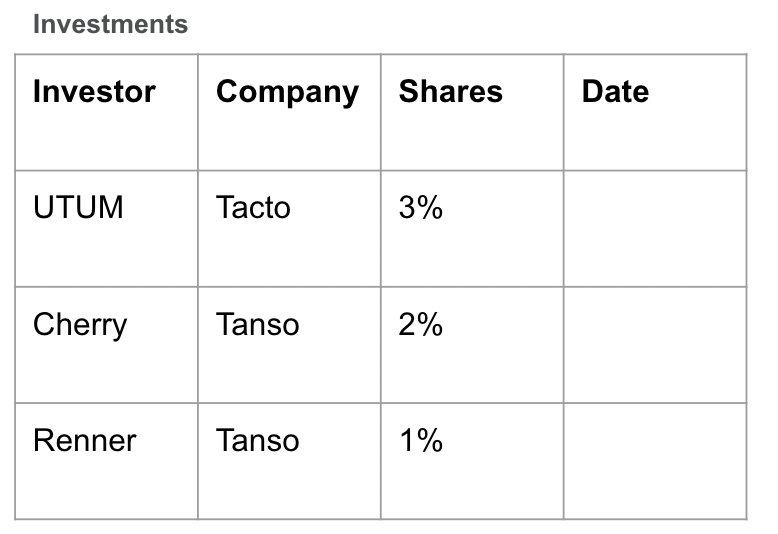



In [4]:
df_investments = df[['name', 'company', 'total_participation_in_percent']]
print(df_investments)


                                              name  \
0    Spitzstein Management UG (haftungsbeschrankt)   
1                              Herr Lieven Hauspie   
2          GBS Investments UG (haftungsbeschrankt)   
3           KM Investments UG (haftungsbeschrankt)   
4       SH Energy Vertures UG (haftungsbeschrankt)   
..                                             ...   
574                        Herr Ashok Varadharajan   
576                    Herr Saravanan Jaichandaran   
578    Herr Ajay Prashanth Narasaraju Gajendraraju   
580                                   Helsing GmbH   
581                          ZenML Inc. Wilmington   

                          company  total_participation_in_percent  
0               fija Finance GmbH                        8.412696  
1               fija Finance GmbH                       15.159357  
2               fija Finance GmbH                        2.123811  
3               fija Finance GmbH                       11.591860  
4          

## Create a Dataframe with all unique companies that have shareholders

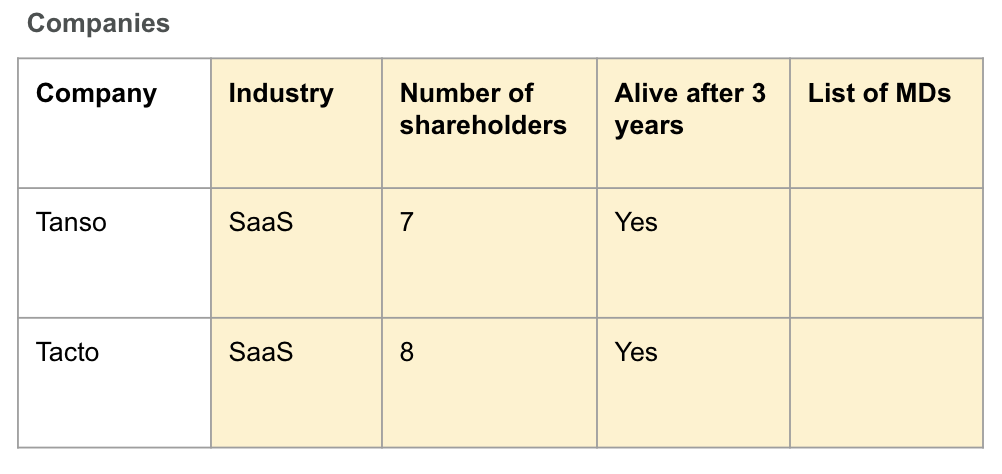

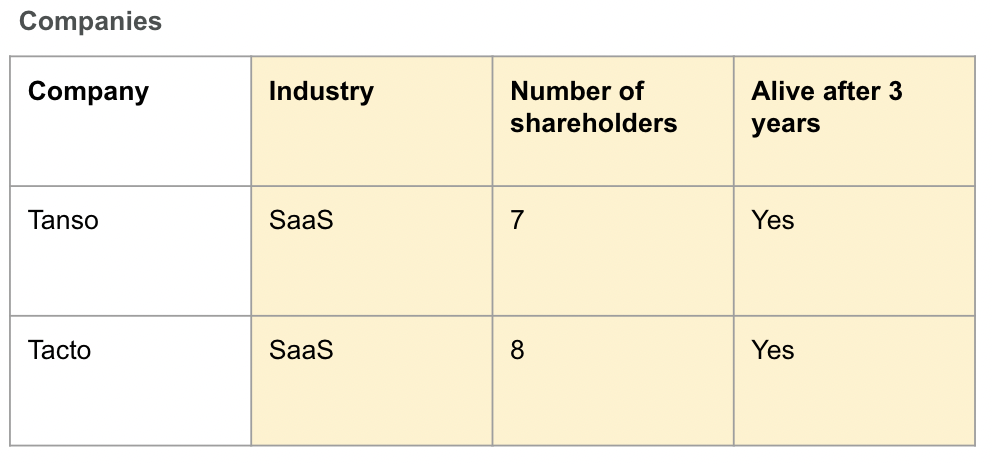

In [5]:
#create a list with all company names and the amount of share holders called df_startups
df_startups = df['company'].value_counts().rename_axis('company').reset_index(name='counts')

# Todo: add list of MDs


print(df_startups)

                                          company  counts
0                         The Exploration Company      51
1             Yababa GmbH_Berlin (Charlottenburg)      43
2     Friday Finance GmbH_Berlin (Charlottenburg)      31
3              Mondu GmbH_Berlin (Charlottenburg)      29
4                                      cureVision      28
..                                            ...     ...
130      Software Defined Automation GmbH_München       1
131                     BUILD & CODE GmbH_Potsdam       1
132      RAMPmedical GmbH_Berlin (Charlottenburg)       1
133  Cryptoticker.io GmbH_Berlin (Charlottenburg)       1
134                            ZenML GmbH_München       1

[135 rows x 2 columns]


## Clean and prepare data in Angels

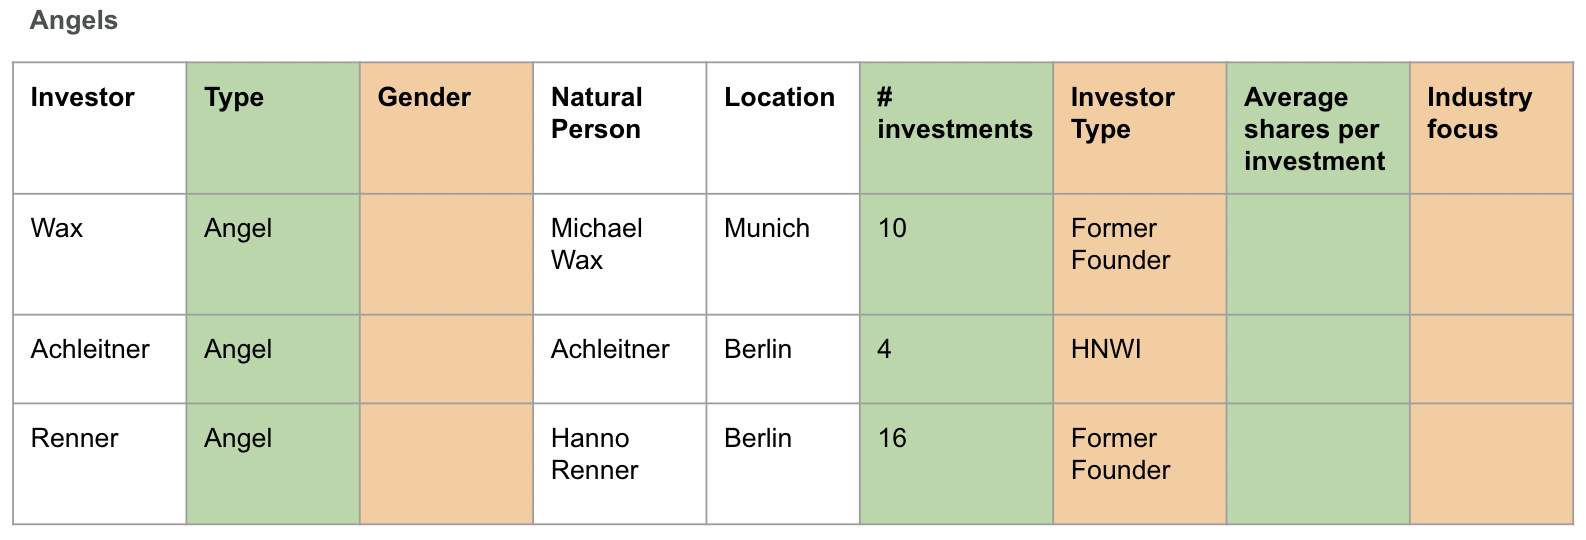

| Variable               | Definition                                                                                           |
|------------------------|------------------------------------------------------------------------------------------------------|
| Type                   | Based on average shares in a company                                                                 |
| Gender                 | Based on matching names to gender                                                                    |
| Natural person         | Retrieving from SI for UG/keeping name where natural person invested without UG                      |
| Location               | Part of SI, part of investment information                                                           |
| Number of investments  | Calculated based on all investment relations                                                         |
| Investor type          | TBD (to be determined)                                                                               |
| Average shares per investment | Calculated based on investment information                                                    |
| Industry information   | Matching with CB (Crunchbase?) information                                                           |



In [6]:
#create a list of unique shareholders and how many companies they are invested in
df_shareholders = df['name'].value_counts().rename_axis('name').reset_index(name='counts')

#add their location to the df_shareholders list
df_shareholders = df_shareholders.merge(df[['name', 'location']], on='name', how='left')
df_shareholders = df_shareholders.drop_duplicates(subset=['name'], keep='first')


#calculate average total participation in percent for each shareholder from original df
df_shareholders['total_participation'] = df_shareholders['name'].apply(lambda x: df[df['name'] == x]['total_participation_in_percent'].sum()/df[df['name'] == x]['company'].count())

#add birthdate if availabel
df_shareholders = df_shareholders.merge(df[['name', 'date_of_birth']], on='name', how='left')
df_shareholders = df_shareholders.drop_duplicates(subset=['name'], keep='first')
#assign random labels to each shareholder, either founder, VC or Angel
#if date_of_birth available assign Angel

labels = ['founder', 'VC', 'Angel']
df_shareholders['label'] = np.random.choice(labels, len(df_shareholders))
#if date_of_birth available assign Angel label
df_shareholders.loc[df_shareholders['date_of_birth'].notnull(), 'label'] = 'Angel'


#add registry details for each angel
df_shareholders = df_shareholders.merge(df[['name', 'company', 'registry_details']], on='name', how='left')
df_shareholders = df_shareholders.drop_duplicates(subset=['name'], keep='first')
print(df_shareholders)

                                                   name  counts  location  \
0                                      PK Projects GmbH       3       NaN   
3     Bayern Kapital Innovationsfonds EFRE GmbH & Co...       3  Landshut   
6                                            Alvio GmbH       3    Berlin   
9                                   Rivus Ventures GmbH       2   München   
11                                        Mercutio GmbH       2    Berlin   
...                                                 ...     ...       ...   
1030        PDA Deutzclie one rales Digitalagentur GmbH       1    Berlin   
1031                                         Dicki GmbH       1   München   
1032                                  Jiinger Invest UG       1   München   
1033                                  Lata Venture GmbH       1   München   
1034                              ZenML Inc. Wilmington       1  Delaware   

      total_participation date_of_birth    label  \
0               11.6297

In [7]:
import requests
from pdf2image import convert_from_bytes
import pytesseract
import io
from urllib.parse import unquote
import tiktoken
from typing import Tuple
import urllib.parse
import pandas as pd

In [8]:
def parse_filename(encoded_filename):
    """
    This function takes an encoded filename string and returns the decoded filename.
    """
    decoded_filename = encoded_filename
    # The filename is after the "UTF-8''" part, so split on that
    try:
        _, encoded_filename = encoded_filename.split("UTF-8''", 1)

    # Now decode the filename
        decoded_filename = urllib.parse.unquote_plus(encoded_filename)
    except:
        pass
    return decoded_filename

def get_pdf_for_company(company: str, document_type: str, bypass_storage: bool = False) -> Tuple[str, str]:
    # get pdf stream directly 
    file_response = requests.post('https://europe-west3-lumpito.cloudfunctions.net/download_files', json={'company': company, 'documents': [document_type], 'bypass_storage': bypass_storage})
    # Make sure the request was successful
    if file_response.status_code == 200:
        # if(file_response.content.format=='TIFF'):
        #     file_response.content = tiff_to_PDF(file_response.content)
        # Try to extract filename from the Content-Disposition header
        content_disposition = file_response.headers.get('Content-Disposition', '')
        if 'attachment; filename=' in content_disposition:
            # Extract filename from Content-Disposition header
            filename = content_disposition.split('filename=')[1]
            # Remove any quotes around the filename
            if '"' in filename or "'" in filename:
                filename = parse_filename(filename.strip("\"'"))
        else:
            mime_type = file_response.headers.get('Content-Type')
            # If the filename is not in the header or you want to set a default
            filename = f'default_filename.{mime_type.split("/")[1]}'

        # Write the PDF binary to a file with the obtained filename
        with open("output/" + filename, 'wb') as f:
            f.write(file_response.content)
        
        return filename, file_response.content
    else:
        print(f'Failed to retrieve PDF: Status code {file_response.status_code}')

In [9]:
import xml.etree.ElementTree as ET


def get_shareholder_details_from_si(company:str):
    file_name, file_content = get_pdf_for_company(company,'si',True)
    with open("output/"+file_name, 'r') as f:
        xml_data = f.read()

    root = ET.fromstring(xml_data)

    df_shareholder_info = pd.DataFrame(columns=['company','vorname', 'nachname', 'geburtsdatum', 'geschlecht'])
    # Define the namespace
    namespaces = {'tns': 'http://www.xjustiz.de'}

    # Find elements with the given namespace
    people = root.findall('.//tns:beteiligung', namespaces)

    for person in people:
        vorname = person.find('.//tns:vorname', namespaces)
        nachname = person.find('.//tns:nachname', namespaces)
        geburtsdatum = person.find('.//tns:geburtsdatum', namespaces)
        geschlecht_code = person.find('.//tns:geschlecht/code', namespaces)

        if vorname is not None and nachname is not None and geburtsdatum is not None and geschlecht_code is not None:
            vorname = vorname.text
            nachname = nachname.text
            geburtsdatum = geburtsdatum.text
            geschlecht = 'Male' if geschlecht_code.text == '1' else 'Female' if geschlecht_code.text == '2' else 'Other'

            # Print the results
            df_shareholder_info = df_shareholder_info.append({'company':company,'vorname': vorname, 'nachname': nachname, 'geburtsdatum': geburtsdatum, 'geschlecht': geschlecht}, ignore_index=True)
            print(df_shareholder_info)
    return df_shareholder_info

In [10]:

df_temp=get_shareholder_details_from_si('Tacto')



  company vorname      nachname geburtsdatum geschlecht
0   Tacto    Nico  Bentenrieder   1991-03-25       Male
  company   vorname      nachname geburtsdatum geschlecht
0   Tacto      Nico  Bentenrieder   1991-03-25       Male
1   Tacto  Johannes         Groll   1995-06-08       Male
  company   vorname      nachname geburtsdatum geschlecht
0   Tacto      Nico  Bentenrieder   1991-03-25       Male
1   Tacto  Johannes         Groll   1995-06-08       Male
2   Tacto     André         Petry   1994-05-28       Male


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_59937/2537619803.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_shareholder_info = df_shareholder_info.append({'company':company,'vorname': vorname, 'nachname': nachname, 'geburtsdatum': geburtsdatum, 'geschlecht': geschlecht}, ignore_index=True)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_59937/2537619803.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_shareholder_info = df_shareholder_info.append({'company':company,'vorname': vorname, 'nachname': nachname, 'geburtsdatum': geburtsdatum, 'geschlecht': geschlecht}, ignore_index=True)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_59937/2537619803.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [11]:
# def get_all_shareholder_details(df_shareholders):
#     df_shareholder_info = pd.DataFrame(columns=['company','vorname', 'nachname', 'geburtsdatum', 'geschlecht'])
    
#     #only take first 15 letters of company name
#     df_shareholders['name'] = df_shareholders['name'].apply(lambda x: ' '.join(str(x).split()[:2]))
    
#     df_shareholders = df_shareholders[df_shareholders['date_of_birth'].isnull()]
   
#     for company in df_shareholders['name'][10:20]:
#         try:
#             print(company)
#             df_shareholder_info = df_shareholder_info.append(get_shareholder_details_from_si(company), ignore_index=True)
#             print(df_shareholder_info)
#         except:
#             #log error
#             pass
#     return df_shareholder_info

# get_all_shareholder_details(df_shareholders)



In [12]:
# get a list of co-investments
import pandas as pd

# Create a new DataFrame where each row represents a co-investment
co_investments = df_investments.merge(df_investments, on='company')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['name_x'] != co_investments['name_y']]
print(co_investments)
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['name_x', 'name_y']).size().reset_index(name='CoInvestments')
print(co_investment_counts)


co_investment_counts.to_csv('co_investment_counts.csv', index=False)


                                              name_x                  company  \
1      Spitzstein Management UG (haftungsbeschrankt)        fija Finance GmbH   
2      Spitzstein Management UG (haftungsbeschrankt)        fija Finance GmbH   
3      Spitzstein Management UG (haftungsbeschrankt)        fija Finance GmbH   
4                                Herr Lieven Hauspie        fija Finance GmbH   
6                                Herr Lieven Hauspie        fija Finance GmbH   
...                                              ...                      ...   
18023                    Herr Saravanan Jaichandaran  bitsCrunch GmbH_München   
18024    Herr Ajay Prashanth Narasaraju Gajendraraju  bitsCrunch GmbH_München   
18025    Herr Ajay Prashanth Narasaraju Gajendraraju  bitsCrunch GmbH_München   
18026    Herr Ajay Prashanth Narasaraju Gajendraraju  bitsCrunch GmbH_München   
18027    Herr Ajay Prashanth Narasaraju Gajendraraju  bitsCrunch GmbH_München   

       total_participation_

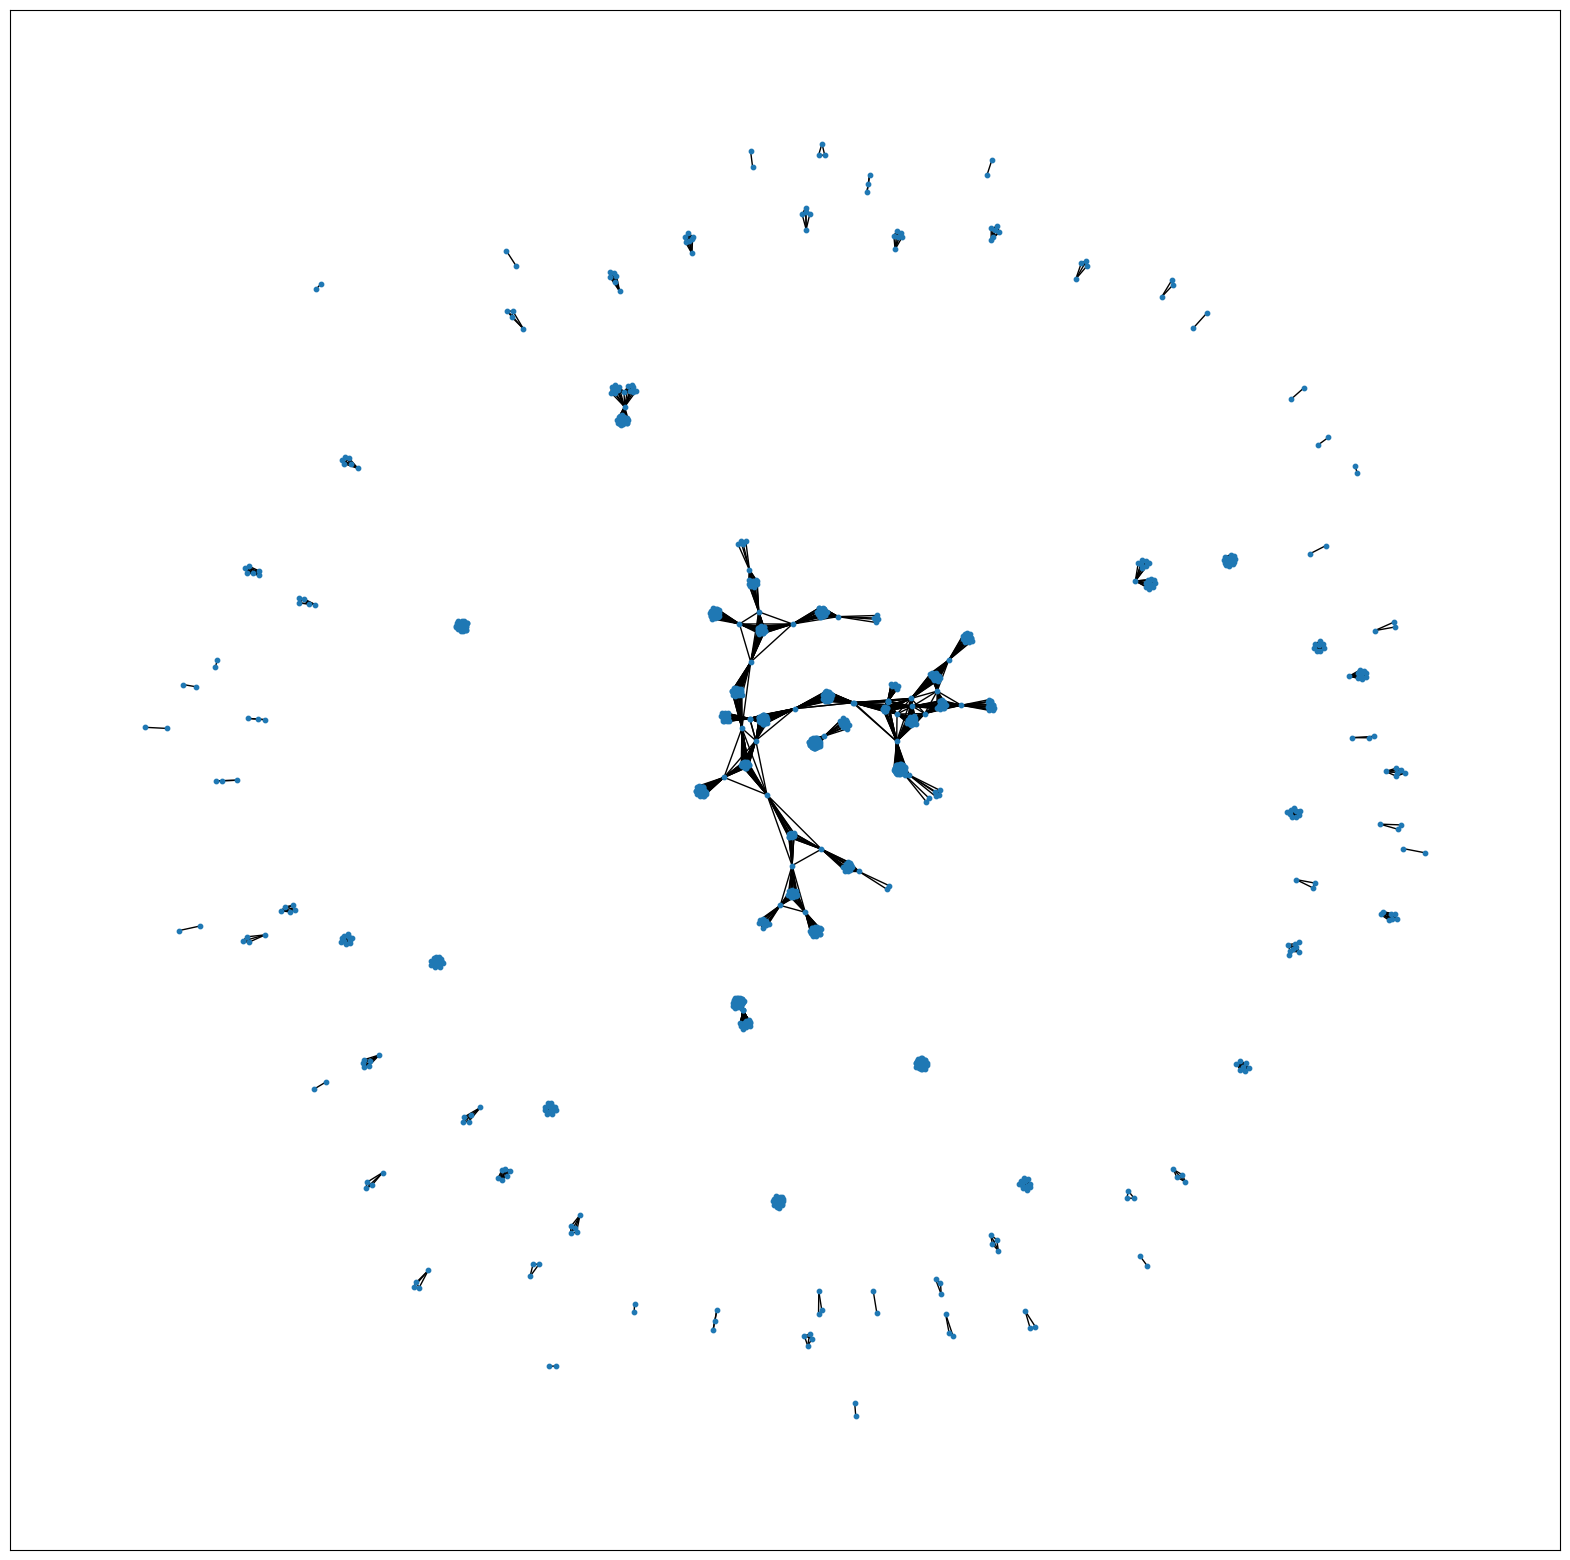

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the co_investment_counts DataFrame
G = nx.from_pandas_edgelist(co_investment_counts, 'name_x', 'name_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [35]:
import pandas as pd
from d3graph import d3graph, vec2adjmat
source = co_investment_counts['name_x']
target = co_investment_counts['name_y']
weight = co_investment_counts['CoInvestments']

adjmat = vec2adjmat(source, target, weight=weight)
print(adjmat)
# Initialize
d3 = d3graph()

d3.graph(adjmat)


[d3graph] INFO> Converting source-target into adjacency matrix..


[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Set directed=True to see the markers!


target                                              $16, LP  10K Ventures OU  \
source                                                                         
$16, LP                                                 0.0              0.0   
10K Ventures OU                                         0.0              0.0   
10x Founders Fund GmbH & Co. KG                         0.0              0.0   
1303 Lemons UG                                          0.0              0.0   
24S.ar.l.                                               0.0              1.0   
...                                                     ...              ...   
uhf Finance GmbH HRB 18628                              0.0              0.0   
van der Heijden Holdings UG (haftungsbeschrankt)        0.0              0.0   
whiletrue GmbH                                          0.0              0.0   
wkcp UG (haftungsbeschränkt) Berlin AG Charlott...      0.0              0.0   
wrapall UG (haftungsbeschrankt)         

[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] WARNING> Colormap [Set2] can not create [88] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 961


In [36]:
# Additional customization for interactivity


# Convert to html and open in the browser
d3.show(filepath='output/graph.html')


[d3graph] INFO> Slider range is set to [0, 2]
[d3graph] INFO> Write to path: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graph.html]


In [37]:
import pandas as pd

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

# Create a DataFrame from the centrality measures
centrality_df = pd.DataFrame({
    'name': degree_centrality.keys(),
    'DegreeCentrality': degree_centrality.values(),
    'BetweennessCentrality': betweenness_centrality.values(),
    'EigenvectorCentrality': eigenvector_centrality.values()
})

# Merge with the unique angel list
angels_df = pd.DataFrame(df_shareholders['name'].unique(), columns=['name'])
angels_with_centrality = pd.merge(angels_df, centrality_df, on='name')

print(angels_with_centrality)

#sort according to EigenvectorCentrality
angels_with_centrality = angels_with_centrality.sort_values(by=['EigenvectorCentrality'], ascending=False)
print(angels_with_centrality)


                                                  name  DegreeCentrality  \
0                                     PK Projects GmbH          0.081081   
1    Bayern Kapital Innovationsfonds EFRE GmbH & Co...          0.034304   
2                                           Alvio GmbH          0.057173   
3                                  Rivus Ventures GmbH          0.032225   
4                                        Mercutio GmbH          0.024948   
..                                                 ...               ...   
958                            Blue Impact Ventures UG          0.019751   
959        PDA Deutzclie one rales Digitalagentur GmbH          0.019751   
960                                         Dicki GmbH          0.019751   
961                                  Jiinger Invest UG          0.019751   
962                                  Lata Venture GmbH          0.019751   

     BetweennessCentrality  EigenvectorCentrality  
0                 0.044217         